In [86]:
import pandas as pd

In [87]:
data = pd.read_csv('DS/heart.csv')

In [88]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
data_dup = data.duplicated().any()

In [90]:
data_dup

True

In [91]:
data = data.drop_duplicates()

In [92]:
data_dup = data.duplicated().any()

In [93]:
data_dup

False

In [94]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [95]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [96]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [97]:
data['cp'].unique()

array([0, 1, 2, 3])

In [98]:
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [99]:
data.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,52,125,212,168,1.0,True,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,53,140,203,155,3.1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,70,145,174,125,2.6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,61,148,203,161,0.0,True,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
4,62,138,294,106,1.9,False,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False


In [100]:
data.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,52,125,212,168,1.0,True,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,53,140,203,155,3.1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,70,145,174,125,2.6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,61,148,203,161,0.0,True,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
4,62,138,294,106,1.9,False,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False


In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [103]:
data.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,True,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,True,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
4,0.839089,0.364848,0.919336,-1.905464,0.739054,False,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False


In [104]:
X = data.drop('target',axis=1)

KeyError: "['target'] not found in axis"

In [ ]:
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

In [ ]:
from sklearn.metrics import accuracy_score

# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [105]:
y_pred3 = knn.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ca
- cp
- exang
- fbs
- restecg
- ...
Feature names seen at fit time, yet now missing:
- ca_1
- ca_2
- ca_3
- ca_4
- cp_1
- ...


In [107]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [60]:
data = pd.read_csv('DS/heart.csv')

In [61]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [62]:
data = data.drop_duplicates()

In [65]:
data.shape

(302, 14)

In [66]:
X = data.drop('target',axis=1)
y = data['target']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier()

In [71]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred2 = dt.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred2)

0.6721311475409836

# Random Forest Algorithm

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()

In [81]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
y_pred1 = rf.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred1)

0.8688524590163934

In [108]:
final_data = pd.DataFrame({'Models':['KNN','DT','RF'],'ACC':
                           [accuracy_score(y_test,y_pred3), 
                            accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred1)]})

In [109]:
final_data

,Models,ACC
0,KNN,0.737705
1,DT,0.672131
2,RF,0.868852


In [111]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [112]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

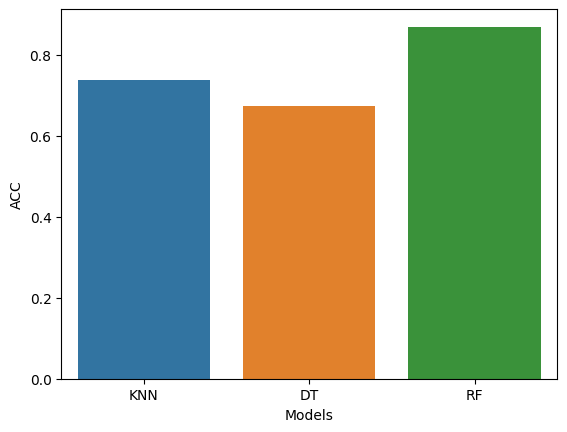

In [117]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])